In [1]:
import keras
import keras.backend as K
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pickle

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

resnet = keras.applications.resnet50.ResNet50(include_top=False, 
                                              weights='imagenet', 
                                              input_tensor=None, 
                                              input_shape=(224,224,3), 
                                              pooling=None, 
                                              classes=1000)

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [2]:
size_factor = int(224/32) # resnet 224 x 224, cifar10 32 x 32
X_train = K.resize_images(X_train[0:100], size_factor, size_factor, data_format="channels_last").numpy()
Y_train = Y_train[0:100]
X_test = K.resize_images(X_test[0:1000], size_factor, size_factor, data_format="channels_last").numpy()
Y_test = Y_test[0:1000]

In [3]:
X_train.shape

(100, 224, 224, 3)

In [4]:
Y_train.shape

(100, 1)

In [5]:
model = keras.Sequential([resnet,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(10, activation='softmax')
                         ])

In [6]:
resnet.trainable = False

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, 
                    Y_train, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=80,)

Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 15s 191ms/step - loss: 2.5053 - accuracy: 0.1375 - val_loss: 2.5840 - val_accuracy: 0.1000
Epoch 2/20
80/80 [==============================] - 13s 157ms/step - loss: 2.1845 - accuracy: 0.1375 - val_loss: 2.5354 - val_accuracy: 0.1000
Epoch 3/20
80/80 [==============================] - 13s 159ms/step - loss: 1.9958 - accuracy: 0.1750 - val_loss: 2.5005 - val_accuracy: 0.1000
Epoch 4/20
80/80 [==============================] - 13s 158ms/step - loss: 1.7956 - accuracy: 0.3000 - val_loss: 2.4527 - val_accuracy: 0.1000
Epoch 5/20
80/80 [==============================] - 13s 160ms/step - loss: 1.5831 - accuracy: 0.4875 - val_loss: 2.4087 - val_accuracy: 0.1500
Epoch 6/20
80/80 [==============================] - 13s 160ms/step - loss: 1.3823 - accuracy: 0.6625 - val_loss: 2.3766 - val_accuracy: 0.1500
Epoch 7/20
80/80 [==============================] - 13s 159ms/step - loss: 1.2038 - accuracy: 0.77

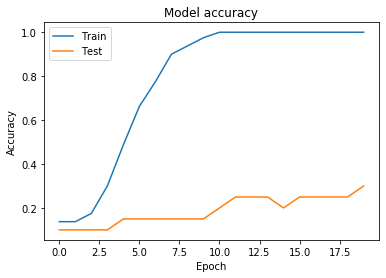

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

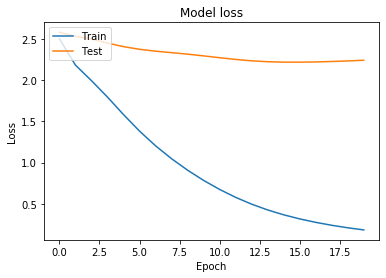

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
score = model.evaluate(X_test, Y_test, verbose=1, batch_size=128)

1000/1000 [==============================] - 145s 145ms/step


In [13]:
score 

[2.0910501079559327, 0.24199999868869781]

In [18]:
model.save('epoch20_adam.h5')
with open('epoch20_adam.history', 'wb') as file_pi:
    pickle.dump(history, file_pi)